In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Exploratory Data Analysis of the csv file

In [ ]:
#loading the data from csv file
insurance_data=pd.read_csv('/content/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#getting shape of dataset
insurance_data.shape

(1338, 7)

In [ ]:
#getting more info on dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

categorical features:
1. smoker
2. sex
3. region

Idea?:
replace the categorical values with numerical values so that it becomes easier to analyse?

In [ ]:
#checking for missing values:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 **DATA ANALYSIS**

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-13-9640a8bde613>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


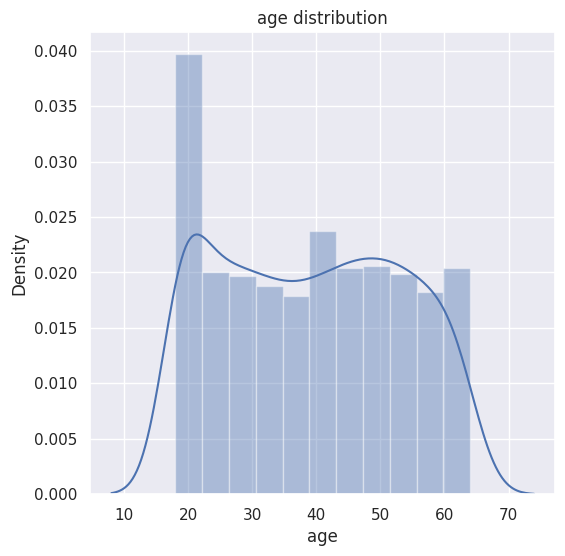

In [ ]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("age distribution")
plt.show()

<ipython-input-14-88366dbe3091>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


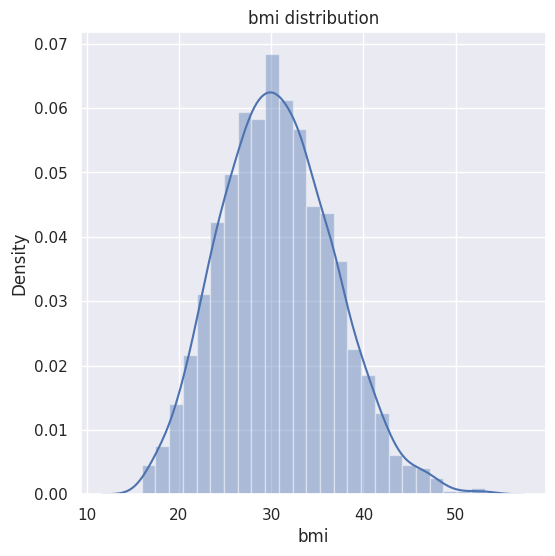

In [ ]:
#distribtuion of bmi
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("bmi distribution")
plt.show()

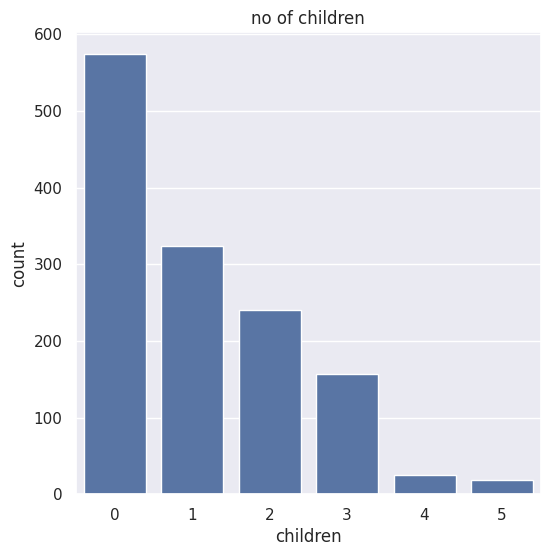

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [ ]:
#children count
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("no of children")
plt.show()
insurance_data['children'].value_counts()

<ipython-input-16-ae28843101fd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


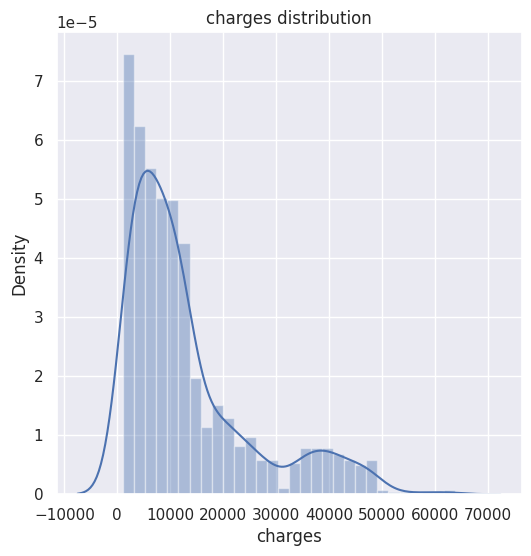

In [ ]:
#charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title("charges distribution")
plt.show()

**DATA PREPROCESSING**

encoding

In [ ]:
#encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding region column
insurance_data.replace({'region':{'southeast':1,'southwest':2,'northwest':3,'northeast':4}},inplace=True)
#encoding smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
#splitting the target
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       4
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#SPLITTING test train data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**MODEL TRAINING**

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Model evaluation

In [ ]:
training_prediction=regressor.predict(x_train)
#r2squared
r2_train=metrics.r2_score(y_train,training_prediction)
print("R2 squared value for training data",r2_train)

R2 squared value for training data 0.7518195459072954


In [ ]:
#prediction on testing data
testing_prediction=regressor.predict(x_test)
#r2squared
r2_test=metrics.r2_score(y_test,testing_prediction)
print("r2 squared value for testing data",r2_test)


r2 squared value for testing data 0.7454471618659975


BUILDING A PREDICTIVE SYSTEM

In [ ]:
data=(1,1,25.74,0,1,3)
input_data=np.asarray(data)
data_reshaped=input_data.reshape(1,-1)
prediction=regressor.predict(data_reshaped)
print("the medical cost for the given dataset is",prediction[0])

the medical cost for the given dataset is -3322.354086027055


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
